In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import random as rd

Norm functions :

In [2]:
def L2_norm(vector):
    n=len(vector)
    norm=0
    for i in range(n):
        temp=vector[i]*vector[i]
        norm+=temp
    norm=math.sqrt(norm)
    return norm

Graphing Helpers : 

In [3]:
def logscale (array):
    n=len(array)
    new=[]
    for i in range(n):
        temp=math.log(array[i])
        new.append(temp)
    return new

Problem specific functions :

In [4]:
def f (y,t,l):
    #let's just take this on RxR for now
    #I'm trying to solve dy/dt=lambda y
    return y*l

In [5]:
def df(y,t,l):
    #Im taking the derivative wrt y here and using the fact that f=y'
    return l

In [6]:
def true_y(t,l):
    #used to compute error estimates
    return math.exp(t*l)

# Part 1. Forward Euler

In [7]:
def FE(y, t, l, h):
    #Forward Euler Method
    temp=y+h*f(y, t, l)
    return temp

# Part 1. Backward Euler:

In [8]:
def F(y,t,x,l,h):
    temp=y+h*f(x,t,l)-x
    return temp

In [9]:
def dF(y,t,x,l,h):
    temp=h*df(x,t,l)-1
    return temp

In [10]:
def BE(y,t,l,h):
    #Backwards Euler Method
    x1=FE(y, t, l, h)
    x2=x1-F(y,t+h, x1,l,h)/dF(y,t+h, x1,l,h)

    i=0
    while abs(x1-x2)>eps:
        temp=x2-F(y,t+h, x2,l,h)/dF(y,t+h, x2,l,h)
        x1=x2
        x2=temp
        i+=1
    return [x2 ,i]

Part 2. Use Backwards Euler to compute error estimates for different lambdas and step sizes :

In [11]:
def findy_list(lbd, h):
    #convenient subfunction for part 2
    n=math.ceil(pivot/h)
    t_list=[i*h for i in range(n+1)]
    y_list=[1.]
    f_list=[1.]
    N=n
    
    true_list=[true_y(t_list[i],lbd) for i in range(math.ceil(pivot/h)+1)]
    #for i in range(len(true_list)):
        #print ("This is the graph (", true_list[i], ",", t_list[i] ,")")

    for i in range(n-1):#I might need this later so I'll keep it un-optimised for now
        forward=FE(f_list[i],t_list[i], lbd,h)
        data=BE(y_list[i],t_list[i], lbd,h)
        y=data[0]
        N+=data[1]
        f_list.append(forward)
        y_list.append(y)
        
#err=abs(true_list[n-1]- y_list[n-1]) #ferr=abs(true_list[n-1]- f_list[n-1])
    true=true_list[n-1]
    y=y_list[n-1]
    ferr=f_list[n-1]
        
    #return [err, ferr, N]
    return [true, y, ferr, N, y_list, f_list, true_list, t_list]

# Part 2 a), b) : Experimenting with different values of $\lambda$ and step sizes

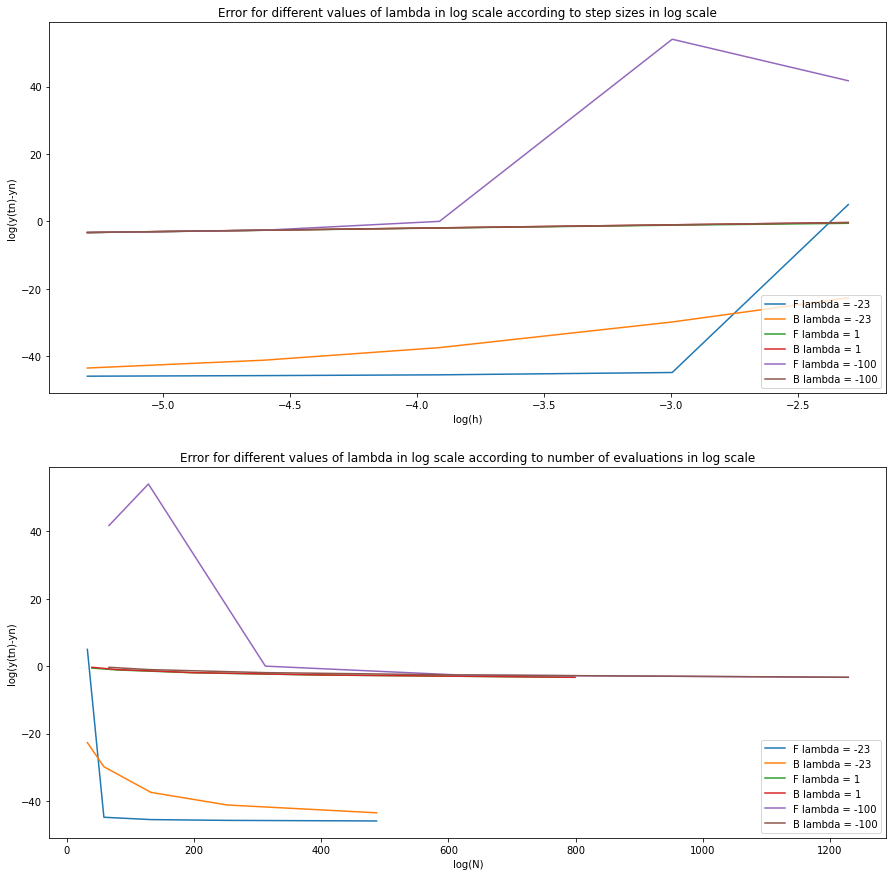

In [12]:
h_list=[0.1, 0.05, 0.02, 0.01, .005]
eps=.000001
lbd_list=[-23, 1, -100]

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,15))

pivot=2


for lbd in lbd_list:
    err_list=[]
    ferr_list=[]
    N_list=[]
    if lbd == -100 : #This takes care of the vector valued case
        for h in h_list:
            result1=findy_list(lbd, h)
            result2=findy_list(1, h)

            N=result1[3]+ result2[3]
            err=[result1[0]-result1[1], result2[0]-result2[1]]
            ferr=[result1[0]-result1[2], result2[0]-result2[2]]
        
            err_list.append(L2_norm(err))
            ferr_list.append(L2_norm(ferr))
            N_list.append(N)
        
    else :
        for h in h_list:#print ("We're doing lbd :", lbd, "and step size :",h)
            result=findy_list(lbd, h)
            err_list.append(abs(result[0]- result[1]))
            ferr_list.append(abs(result[0]- result[2]))
            N_list.append(result[3])
    
    ax1.plot(logscale(h_list), logscale(ferr_list),label='F lambda = {}'.format(lbd))
    ax1.plot(logscale(h_list), logscale(err_list),label='B lambda = {}'.format(lbd))
    ax1.set_title(r'Error for different values of lambda in log scale according to step sizes in log scale')#ax1.xaxis.set_label_coords(.5,.06)
    ax1.set_xlabel(r'log(h)')
    ax1.set_ylabel('log(y(tn)-yn)')
    ax1.legend(loc="lower right")
    
    ax2.plot(N_list, logscale(ferr_list),label='F lambda = {}'.format(lbd))
    ax2.plot(N_list, logscale(err_list),label='B lambda = {}'.format(lbd))
    ax2.set_title(r'Error for different values of lambda in log scale according to number of evaluations in log scale')#ax1.xaxis.set_label_coords(.5,.06)
    ax2.set_xlabel(r'log(N)')
    ax2.set_ylabel('log(y(tn)-yn)')
    ax2.legend(loc="lower right")

We observe that Backwards and Forward Euler approximation methods behave quite differently. The most noticeable instance is for $\lambda=-100$, where Forward Euler completely breaks down. This is due to its inherent numerical instability. 

# Part 2.c) : Evolution of approximation error as time increases 

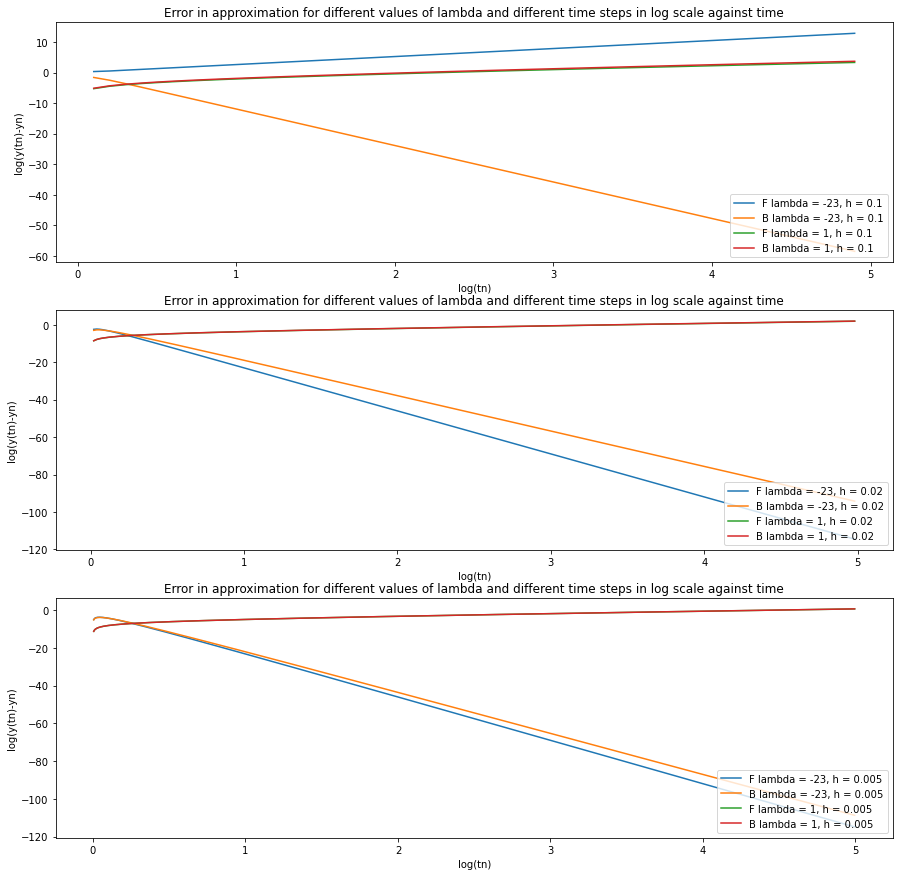

In [13]:
h_list=[0.1, 0.02, .005]
eps=.000001
lbd_list=[-23, 1, -100]

fig, axs = plt.subplots(3,figsize=(15,15))

pivot=5 

j=0

for h in h_list:
    for lbd in [-23,1]:
        err_list=[]
        ferr_list=[]
        t_list=[]
        result= findy_list(lbd, h)
        for i in range(len(result[4])-1):
            err_list.append(abs(result[4][i+1] - result[6][i+1]))
            ferr_list.append(abs(result[5][i+1] - result[6][i+1]))
            t_list.append(result[7][i+1])
            
        axs[j].plot(t_list, logscale(ferr_list),label='F lambda = {}, h = {}'.format(lbd,h))
        axs[j].plot(t_list, logscale(err_list),label='B lambda = {}, h = {}'.format(lbd,h))
        axs[j].set_title(r'Error in approximation for different values of lambda and different time steps in log scale against time')#ax1.xaxis.set_label_coords(.5,.06)
        axs[j].set_xlabel(r'log(tn)')
        axs[j].set_ylabel('log(y(tn)-yn)')
        axs[j].legend(loc="lower right")
        
    j+=1

plt.show()

# Overimposed solutions :

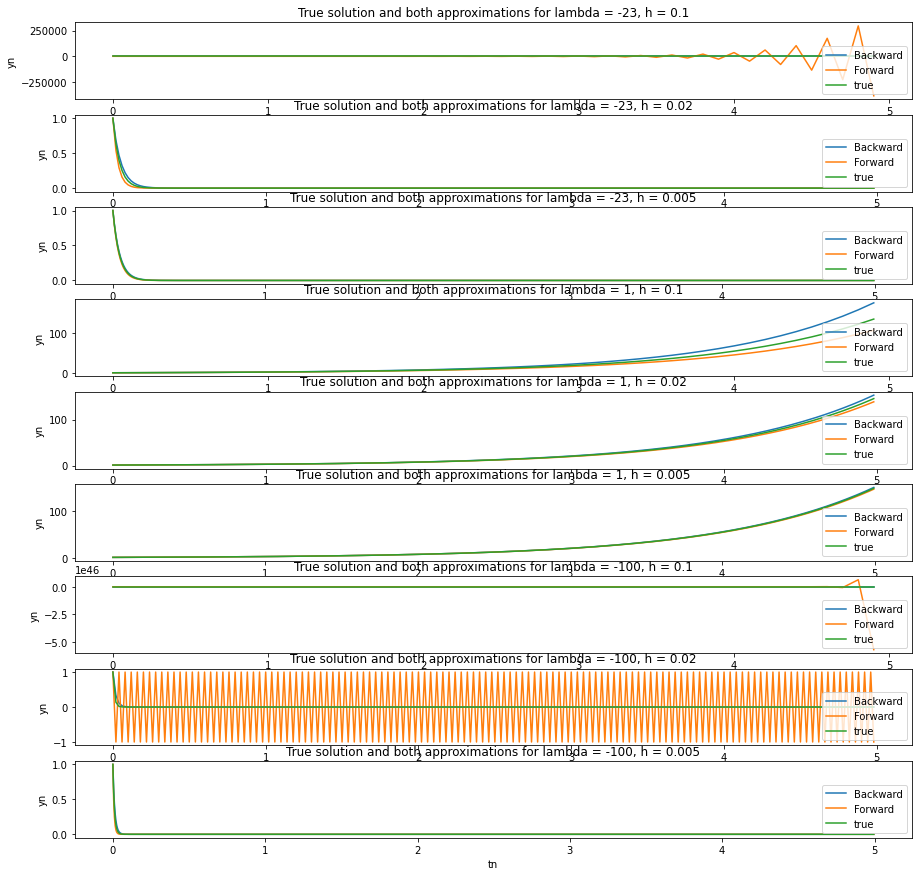

In [14]:
h_list=[0.1, 0.02, .005]
eps=.000001
lbd_list=[-23, 1, -100]

fig, axs = plt.subplots(len(h_list)*len(lbd_list),figsize=(15,15))

pivot=5 

j=0

for lbd in lbd_list:
    for h in h_list:
        result= findy_list(lbd, h)
        B_list=result[4]
        F_list=result[5]
        T_list=result[6]
        t_list=result[7]
        del t_list[-1]
        del T_list[-1]
        #result= findy_list(lbd, h)
        #for i in range(len(result[4])-1):
        #    err_list.append(abs(result[4][i+1] - result[6][i+1]))
        #    ferr_list.append(abs(result[5][i+1] - result[6][i+1]))
        #    t_list.append(result[7][i+1])
            
        axs[j].plot(t_list, B_list ,label='Backward'.format(lbd,h))
        axs[j].plot(t_list, F_list,label='Forward'.format(lbd,h))
        axs[j].plot(t_list, T_list,label='true'.format(lbd,h))
        axs[j].set_title(r'True solution and both approximations for lambda = {}, h = {}'.format(lbd,h))#ax1.xaxis.set_label_coords(.5,.06)
        axs[j].set_xlabel(r'tn')
        axs[j].set_ylabel('yn')
        axs[j].legend(loc="lower right")
        j+=1

plt.show()

>Notice the hyper instability of Forward Euler for $\lambda =-100$ and $h=0.2$ is apparent here.

# Part 3 : Implementation of Runge Methods

In [36]:
def midpoint(y, t, l, h):
    temp=f(y,t,l)
    nxt=y+h*f(y+h*temp/2, t+h/2, l)
    return nxt

In [54]:
def RKutta(y,t,l,h):
    temp1=f(y, t, l)
    temp2=f(y + h*temp1/2, t +h/2, l)
    temp3=f(y + h*temp2/2, t +h/2, l)
    temp4=f(y + h*temp3, t +h, l)
    nxt= y + h*(temp1/6 + temp2/3 + temp3/3 + temp4/6)
    return nxt

In [59]:
def find3y_list(lbd, h):
    #convenient subfunction for comparative analysis in Q3
    n=math.ceil(pivot/h)
    t_list=[i*h for i in range(n+1)]
    mid_list=[1.]
    RK_list=[1.]
    N=n
    
    true_list=[true_y(t_list[i],lbd) for i in range(math.ceil(pivot/h)+1)]
    #for i in range(len(true_list)):
        #print ("This is the graph (", true_list[i], ",", t_list[i] ,")")

    for i in range(n-1):#I might need this later so I'll keep it un-optimised for now
        mid=midpoint(mid_list[i],t_list[i], lbd, h)
        RK=RKutta(RK_list[i],t_list[i], lbd, h)
        mid_list.append(mid)
        RK_list.append(RK)
        
#err=abs(true_list[n-1]- y_list[n-1]) #ferr=abs(true_list[n-1]- f_list[n-1])
    true=true_list[n-1]
    mid=mid_list[n-1]
    RK=RK_list[n-1]
        
    #return [err, ferr, N]
    return [true, mid, RK, N, mid_list, RK_list, true_list, t_list]

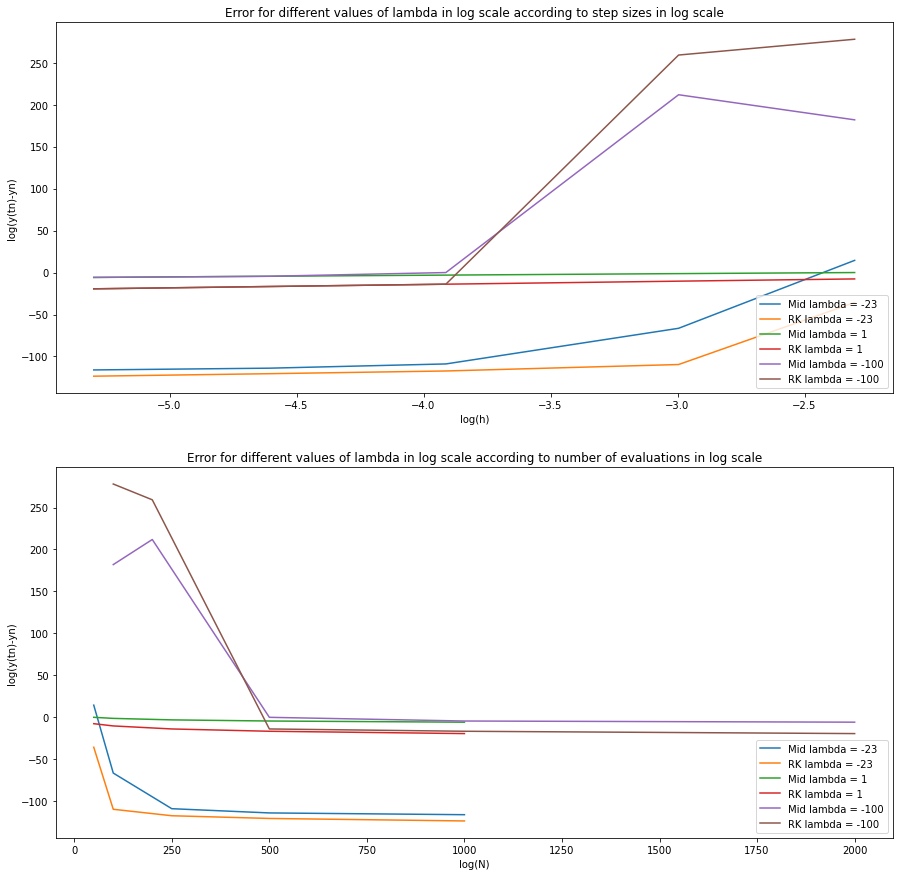

In [65]:
h_list=[0.1, 0.05, 0.02, 0.01, .005]
eps=.000001
lbd_list=[-23, 1, -100]

fig, (ax1, ax2) = plt.subplots(2,figsize=(15,15))

pivot=5


for lbd in lbd_list:
    Merr_list=[]
    RKerr_list=[]
    N_list=[]
    if lbd == -100 : #This takes care of the vector valued case
        for h in h_list:
            result1=find3y_list(lbd, h)
            result2=find3y_list(1, h)

            N=result1[3]+ result2[3]
            Merr=[result1[0]-result1[1], result2[0]-result2[1]]
            RKerr=[result1[0]-result1[2], result2[0]-result2[2]]
        
            Merr_list.append(L2_norm(Merr))
            RKerr_list.append(L2_norm(RKerr))
            N_list.append(N)
        
    else :
        for h in h_list:#print ("We're doing lbd :", lbd, "and step size :",h)
            result=find3y_list(lbd, h)
            Merr_list.append(abs(result[0]- result[1]))
            RKerr_list.append(abs(result[0]- result[2]))
            N_list.append(result[3])
    
    ax1.plot(logscale(h_list), logscale(Merr_list),label='Mid lambda = {}'.format(lbd))
    ax1.plot(logscale(h_list), logscale(RKerr_list),label='RK lambda = {}'.format(lbd))
    ax1.set_title(r'Error for different values of lambda in log scale according to step sizes in log scale')#ax1.xaxis.set_label_coords(.5,.06)
    ax1.set_xlabel(r'log(h)')
    ax1.set_ylabel('log(y(tn)-yn)')
    ax1.legend(loc="lower right")
    
    ax2.plot(N_list, logscale(Merr_list),label='Mid lambda = {}'.format(lbd))
    ax2.plot(N_list, logscale(RKerr_list),label='RK lambda = {}'.format(lbd))
    ax2.set_title(r'Error for different values of lambda in log scale according to number of evaluations in log scale')#ax1.xaxis.set_label_coords(.5,.06)
    ax2.set_xlabel(r'log(N)')
    ax2.set_ylabel('log(y(tn)-yn)')
    ax2.legend(loc="lower right")

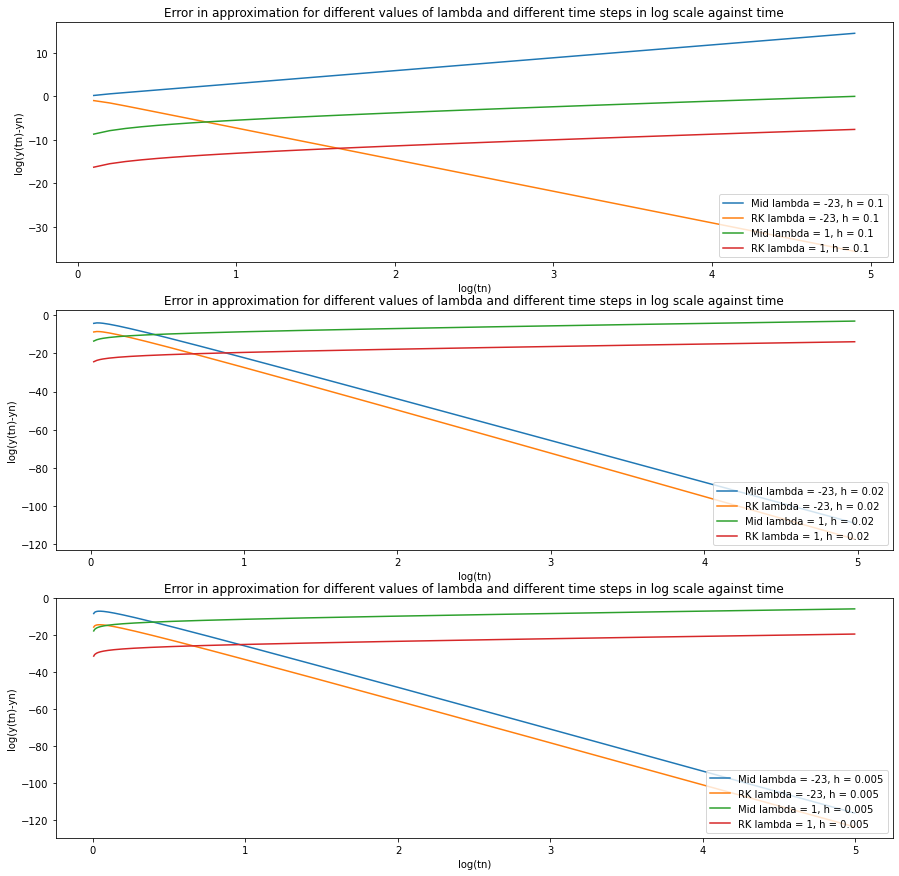

In [63]:
h_list=[0.1, 0.02, .005]
eps=.000001
lbd_list=[-23, 1, -100]

fig, axs = plt.subplots(3,figsize=(15,15))

pivot=5 

j=0

for h in h_list:
    for lbd in [-23,1]:
        Merr_list=[]
        RKerr_list=[]
        t_list=[]
        result= find3y_list(lbd, h)
        for i in range(len(result[4])-1):
            Merr_list.append(abs(result[4][i+1] - result[6][i+1]))
            RKerr_list.append(abs(result[5][i+1] - result[6][i+1]))
            t_list.append(result[7][i+1])
            
        axs[j].plot(t_list, logscale(Merr_list),label='Mid lambda = {}, h = {}'.format(lbd,h))
        axs[j].plot(t_list, logscale(RKerr_list),label='RK lambda = {}, h = {}'.format(lbd,h))
        axs[j].set_title(r'Error in approximation for different values of lambda and different time steps in log scale against time')#ax1.xaxis.set_label_coords(.5,.06)
        axs[j].set_xlabel(r'log(tn)')
        axs[j].set_ylabel('log(y(tn)-yn)')
        axs[j].legend(loc="lower right")
        
    j+=1

plt.show()

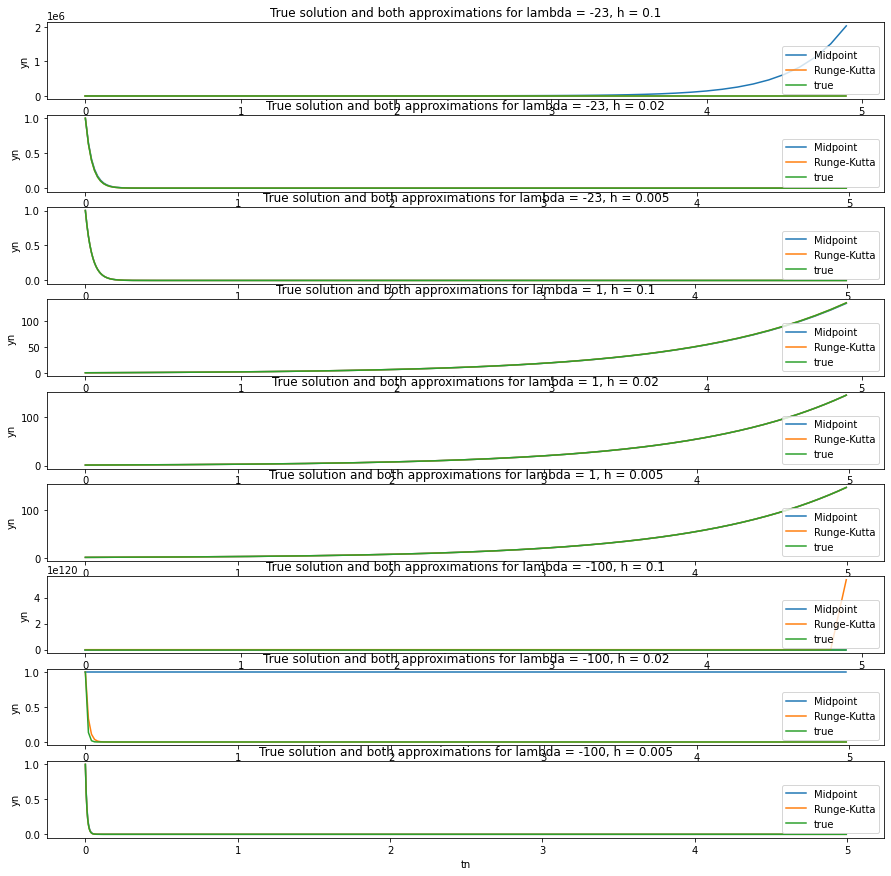

In [66]:
h_list=[0.1, 0.02, .005]
eps=.000001
lbd_list=[-23, 1, -100]

fig, axs = plt.subplots(len(h_list)*len(lbd_list),figsize=(15,15))

pivot=5 

j=0

for lbd in lbd_list:
    for h in h_list:
        result= find3y_list(lbd, h)
        M_list=result[4]
        RK_list=result[5]
        T_list=result[6]
        t_list=result[7]
        del t_list[-1]
        del T_list[-1]
        #result= findy_list(lbd, h)
        #for i in range(len(result[4])-1):
        #    err_list.append(abs(result[4][i+1] - result[6][i+1]))
        #    ferr_list.append(abs(result[5][i+1] - result[6][i+1]))
        #    t_list.append(result[7][i+1])
            
        axs[j].plot(t_list, M_list ,label='Midpoint'.format(lbd,h))
        axs[j].plot(t_list, RK_list,label='Runge-Kutta'.format(lbd,h))
        axs[j].plot(t_list, T_list,label='true'.format(lbd,h))
        axs[j].set_title(r'True solution and both approximations for lambda = {}, h = {}'.format(lbd,h))#ax1.xaxis.set_label_coords(.5,.06)
        axs[j].set_xlabel(r'tn')
        axs[j].set_ylabel('yn')
        axs[j].legend(loc="lower right")
        j+=1

plt.show()